<a href="https://colab.research.google.com/github/helenvps3/Data_science_II_Entrega_1/blob/main/Data_science_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Resumen**

El proyecto analiza un conjunto de datos sobre salud mental para identificar patrones y relaciones entre factores demográficos, laborales y personales con el estado de salud mental. Se realizaron procesos de limpieza y análisis exploratorio, encontrando que ciertas variables (como nivel de estrés, edad y género) influyen en la presencia de problemas de salud mental. Estos resultados permiten orientar estrategias preventivas y de intervención temprana.

**Objetivo**

El objetivo del proyecto es determinar qué variables están asociadas con la salud mental (o con manifestaciones de trastornos mentales) en los datos analizados, con el fin de poder predecir o identificar individuos con mayor probabilidad de presentar dificultades de salud mental. Asimismo, proporcionar insights que permitan intervenir temprano, o diseñar estrategias de prevención.

**Contexto Comercial (Imaginado)**

Empresa: BetterMind Analytics, una startup dedicada a ofrecer soluciones de salud mental basada en datos para empresas, clínicas, y organizaciones no gubernamentales. Su misión es usar análisis de datos para mejorar bienestar emocional, prevención y cuidado psicológico.

**Posición**

BetterMind Analytics ha recolectado datos de encuestas de empleados/usuarios sobre salud mental, bienestar, demografía, estilos de vida, estrés, apoyo social, etc. Su interés ahora es entender estos datos para:

Identificar cuáles son los principales factores de riesgo en la población que atienden.

Segmentar el público para una intervención personalizada (por ejemplo, programas de prevención para quienes más lo necesitan).

Diseñar herramientas predictivas internas que permitan alertar cuando un usuario está en riesgo elevado de deterioro de salud mental.


**Motivo del objetivo**

Porque la salud mental impacta fuertemente en productividad, calidad de vida, costos de tratamiento, ausentismo, etc. Si BetterMind puede predecir o identificar precozmente personas en riesgo, puede ofrecer sus servicios de intervención temprana, programas de bienestar corporativo, asesorías psicológicas, etc., lo cual tiene valor tanto para el cliente como empresarial.

In [37]:
import warnings
warnings.filterwarnings('ignore')

#Importar librerias y dataset a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from seaborn import distplot
from seaborn import histplot

# url
url_dataset = "https://raw.githubusercontent.com/helenvps3/dataset/refs/heads/main/mental_health_dataset.csv"
# Cargar datos
df = pd.read_csv(url_dataset, sep = ';')

In [38]:
# Ultimas 5 filas
df.tail()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
9995,34,Female,Employed,On-site,Yes,Yes,5,6.1,3,9,21,8,90.0,Medium
9996,47,Male,Employed,On-site,Yes,No,1,5.7,3,5,12,45,90.8,Medium
9997,56,Female,Employed,On-site,Yes,No,1,8.3,0,1,18,7,99.2,Medium
9998,24,Male,Employed,On-site,Yes,Yes,9,6.1,0,28,21,32,56.7,High
9999,44,Male,Unemployed,Remote,No,Yes,5,6.4,7,1,16,25,100.0,Medium


In [39]:
# Dimension del dataset
print("Dimension del dataset: ", df.shape)

Dimension del dataset:  (10000, 14)


In [40]:
# Nombre de las columnas
df.columns

Index(['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level',
       'sleep_hours', 'physical_activity_days', 'depression_score',
       'anxiety_score', 'social_support_score', 'productivity_score',
       'mental_health_risk'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

In [42]:
# Valores nulos
df.isnull().sum()

,0
age,0
gender,0
employment_status,0
work_environment,0
mental_health_history,0
seeks_treatment,0
stress_level,0
sleep_hours,0
physical_activity_days,0
depression_score,0


In [43]:
# Valores duplicados
df.duplicated().sum()

np.int64(0)

In [44]:
# Porporcion de valores faltantes en el conjunto de datos
df.isnull().sum()/len(df)*100

,0
age,0.0
gender,0.0
employment_status,0.0
work_environment,0.0
mental_health_history,0.0
seeks_treatment,0.0
stress_level,0.0
sleep_hours,0.0
physical_activity_days,0.0
depression_score,0.0


Estadistica descriptiva

In [45]:
# Funcion round para visualizar mejor los datos
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,10000.0,41.56,13.75,18.0,30.0,41.5,53.0,65.0
stress_level,10000.0,5.57,2.89,1.0,3.0,6.0,8.0,10.0
sleep_hours,10000.0,6.47,1.47,3.0,5.5,6.5,7.5,10.0
physical_activity_days,10000.0,3.51,2.28,0.0,2.0,4.0,5.0,7.0
depression_score,10000.0,15.04,8.99,0.0,7.0,15.0,23.0,30.0
anxiety_score,10000.0,10.56,6.32,0.0,5.0,11.0,16.0,21.0
social_support_score,10000.0,50.12,29.23,0.0,25.0,50.0,76.0,100.0
productivity_score,10000.0,77.31,14.06,42.8,65.8,77.6,89.2,100.0


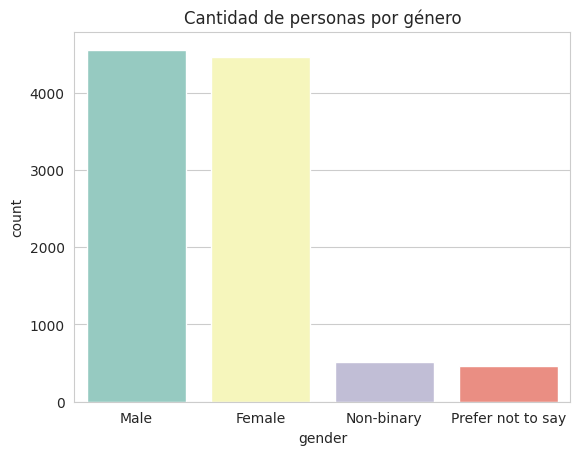

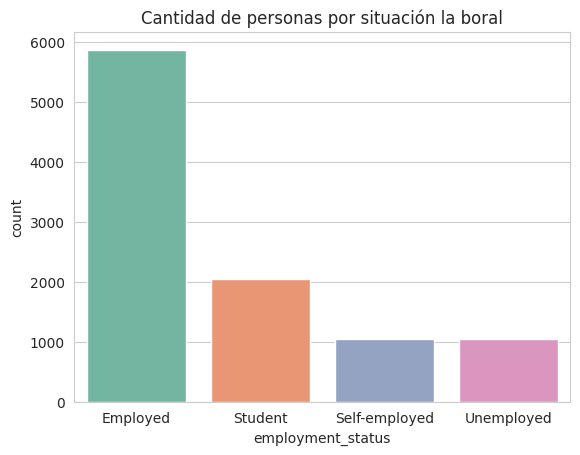

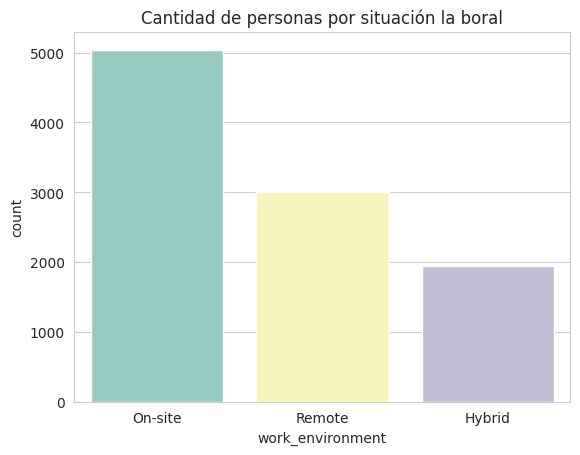

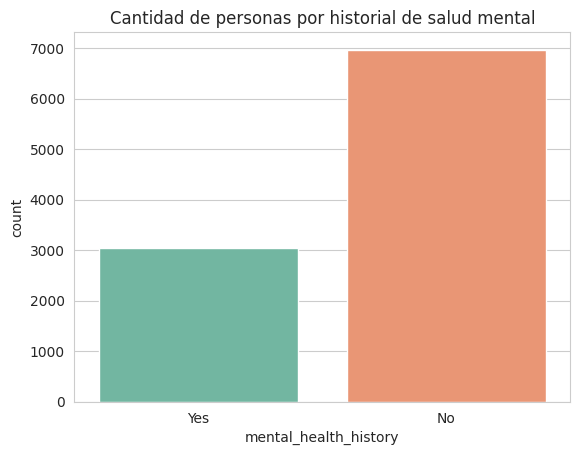

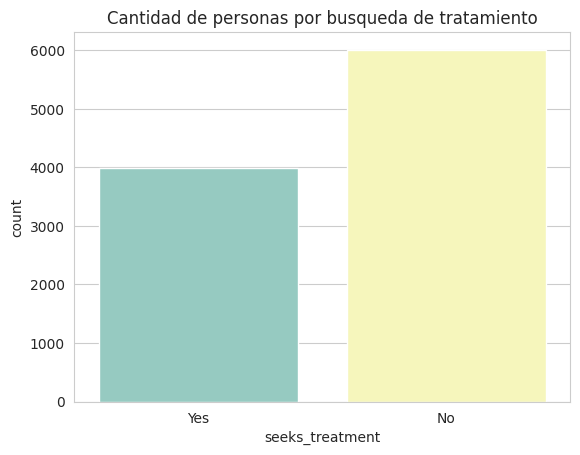

In [46]:
# Gráfico de barras
sns.countplot(x='gender', data=df, palette='Set3')
plt.title('Cantidad de personas por género')
plt.show()

sns.countplot(x='employment_status', data=df, palette='Set2')
plt.title('Cantidad de personas por situación la boral')
plt.show()

sns.countplot(x='work_environment', data=df, palette='Set3')
plt.title('Cantidad de personas por situación la boral')
plt.show()

sns.countplot(x='mental_health_history', data=df, palette='Set2')
plt.title('Cantidad de personas por historial de salud mental')
plt.show()

sns.countplot(x='seeks_treatment', data=df, palette='Set3')
plt.title('Cantidad de personas por busqueda de tratamiento')
plt.show()

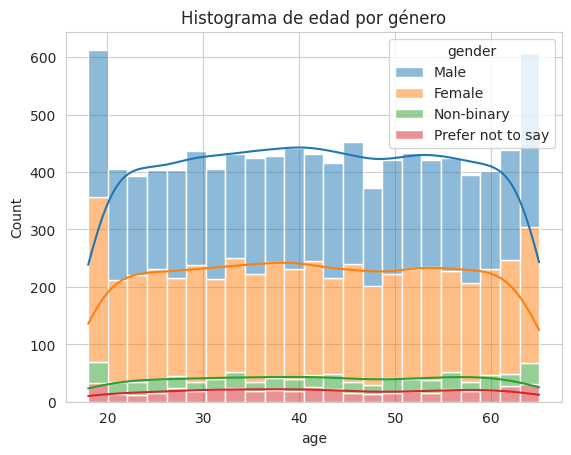

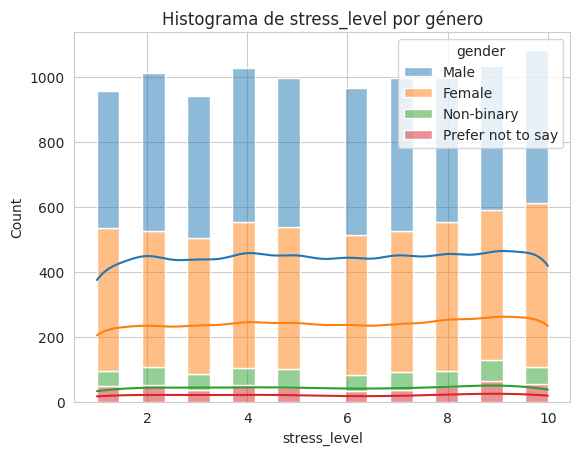

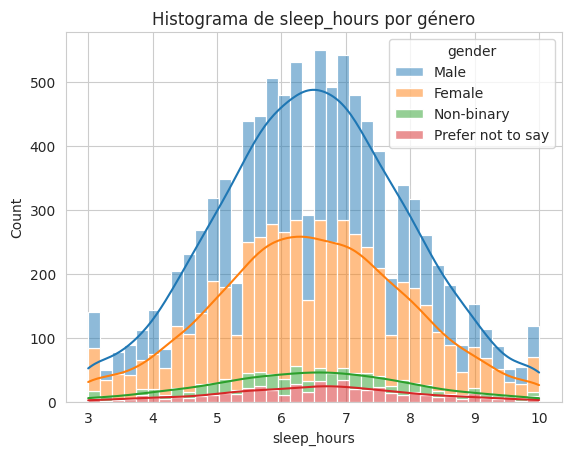

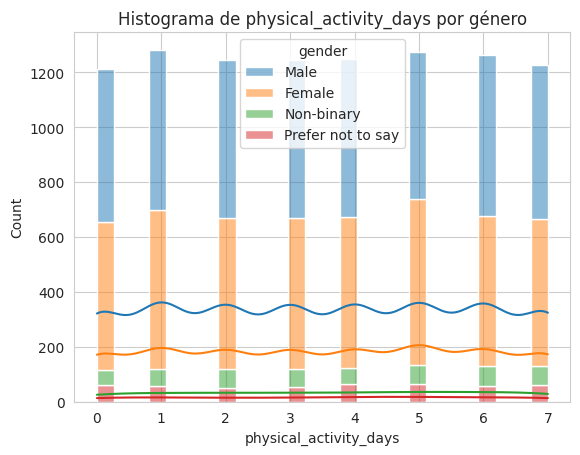

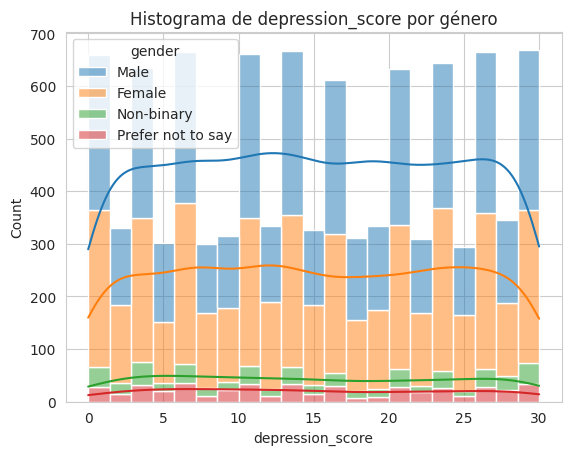

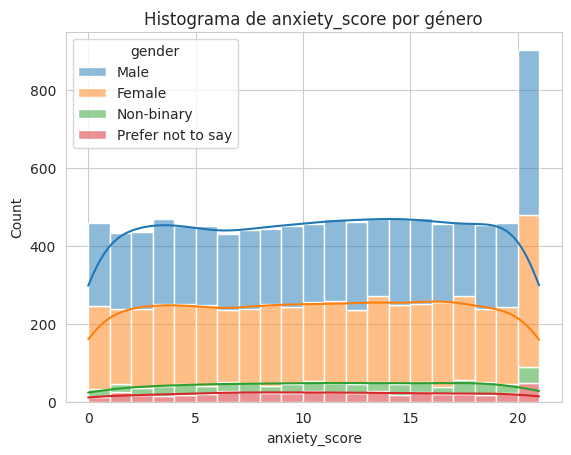

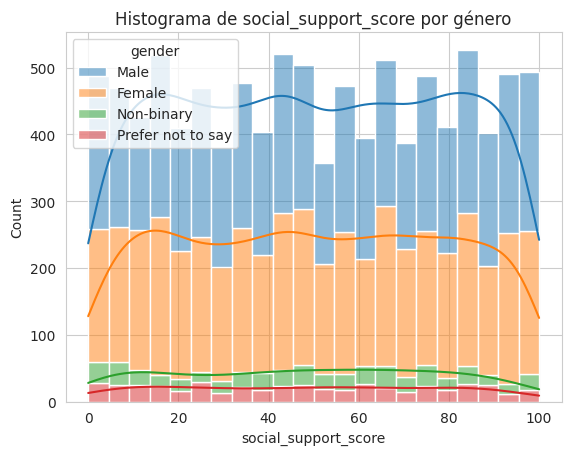

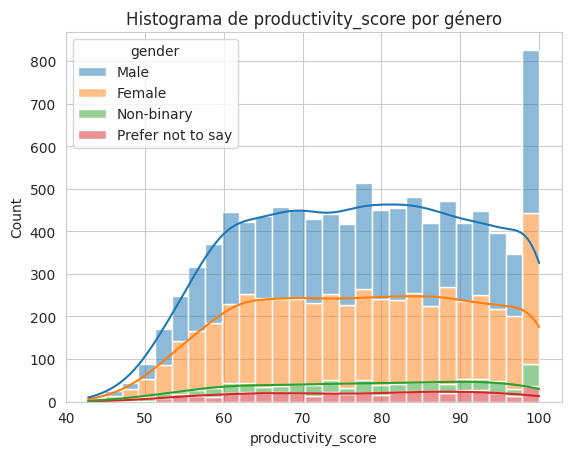

In [47]:
# Histograma variables vs género
sns.histplot(data=df,x='age',hue='gender', multiple="stack",kde=True)
plt.title('Histograma de edad por género')
plt.show()

sns.histplot(data=df,x='stress_level',hue='gender', multiple="stack",kde=True)
plt.title('Histograma de stress_level por género')
plt.show()

sns.histplot(data=df,x='sleep_hours',hue='gender', multiple="stack",kde=True)
plt.title('Histograma de sleep_hours por género')
plt.show()

sns.histplot(data=df,x='physical_activity_days',hue='gender', multiple="stack",kde=True)
plt.title('Histograma de physical_activity_days por género')
plt.show()

sns.histplot(data=df,x='depression_score',hue='gender', multiple="stack",kde=True)
plt.title('Histograma de depression_score por género')
plt.show()

sns.histplot(data=df,x='anxiety_score',hue='gender', multiple="stack",kde=True)
plt.title('Histograma de anxiety_score por género')
plt.show()

sns.histplot(data=df,x='social_support_score',hue='gender', multiple="stack",kde=True)
plt.title('Histograma de social_support_score por género')
plt.show()

sns.histplot(data=df,x='productivity_score',hue='gender', multiple="stack",kde=True)
plt.title('Histograma de productivity_score por género')
plt.show()

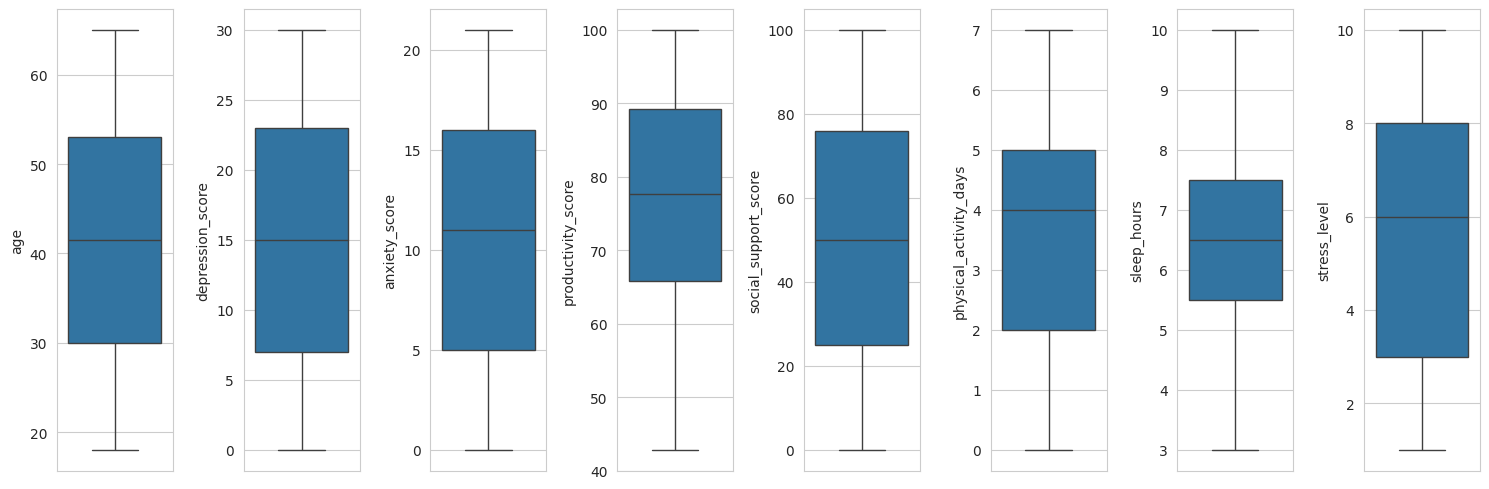

In [48]:
# Boxplot
variables = ['age','depression_score', 'anxiety_score', 'productivity_score', 'social_support_score',
             'physical_activity_days','sleep_hours','stress_level']

fig, axes = plt.subplots(1,len(variables),figsize=(15,5))

for ax, variable in zip(axes, variables):
  ax= sns.boxplot(y=variable,data=df,ax=ax)
  plt.tight_layout()

In [49]:
# Prueba de Shapiro
from scipy.stats import shapiro

# La variable sleep_hours parece a simple vista ser normal, se va a comprobar con un test estadistico
# Realizar el test en sleep_hours

shapiro_test = shapiro(df['sleep_hours'])
shapiro_pvalue = shapiro_test.pvalue

print(shapiro_pvalue)

# El resultado es menor a 0.05, asi que los datos no siguen una distribucion normal

9.385225805732938e-17


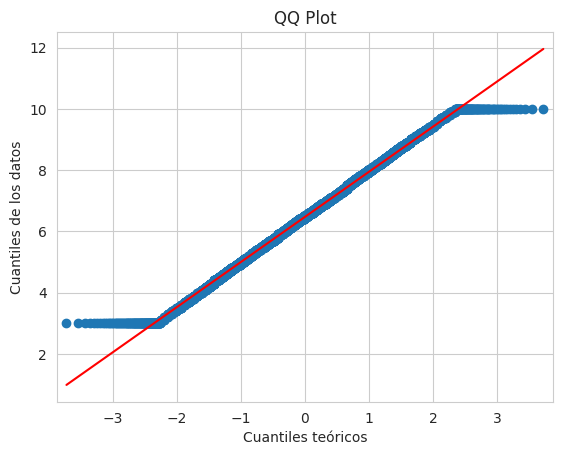

In [50]:
# QQplot sleep_hours
import statsmodels.api as sm

# Crear el QQplot
sm.qqplot(df['sleep_hours'], line='s')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.title('QQ Plot')
plt.show()

<Axes: xlabel='sleep_hours', ylabel='Density'>

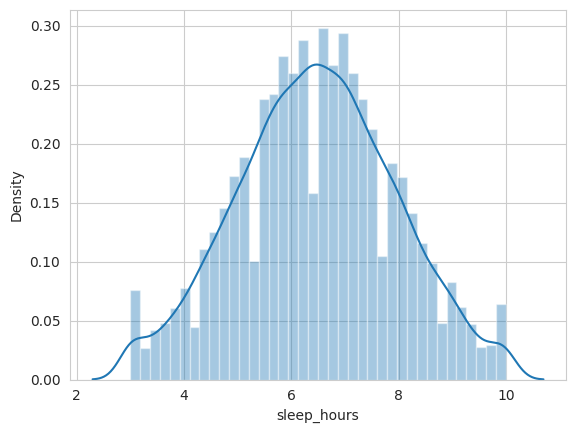

In [51]:
distplot(df['sleep_hours'])

In [52]:
# Variable objetivo df['sleep_hours']

# Calcular el z-score
df['sleep_hours_Z'] = (df['sleep_hours'] - df['sleep_hours'].mean())/df['sleep_hours'].std()
# Variable para marcar outliers
df['sleep_hours_outliers'] = 0
# Condicion para marcar outliers --> z-score > 3 0 < -3
df.loc[df['sleep_hours_Z'] > 3 | (df['sleep_hours_Z'] < -3),'sleep_hours_outliers'] = 1
# Resultados
df[['sleep_hours','sleep_hours_Z','sleep_hours_outliers']]

,sleep_hours,sleep_hours_Z,sleep_hours_outliers
0,6.2,-0.185217,0
1,9.0,1.714448,1
2,7.7,0.832461,0
3,4.5,-1.338586,0
4,5.4,-0.727979,0
...,...,...,...
9995,6.1,-0.253063,0
9996,5.7,-0.524443,0
9997,8.3,1.239532,1
9998,6.1,-0.253063,0


In [53]:
# Casos marcados
df['sleep_hours_outliers'].value_counts()

,count
sleep_hours_outliers,
0,8362
1,1638


In [54]:
df[df['sleep_hours_outliers'] == 1]

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk,sleep_hours_Z,sleep_hours_outliers
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High,1.714448,1
5,38,Female,Unemployed,On-site,Yes,Yes,3,9.9,3,17,9,63,69.3,Medium,2.325055,1
10,28,Female,Self-employed,On-site,Yes,No,6,9.7,2,14,9,85,71.2,Medium,2.189364,1
14,41,Male,Employed,On-site,No,No,1,8.0,1,22,0,52,75.9,Medium,1.035996,1
16,39,Male,Employed,Remote,No,No,2,8.7,2,14,6,64,85.8,Medium,1.510912,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,41,Male,Student,Remote,No,Yes,10,8.2,0,22,21,18,75.1,High,1.171686,1
9965,55,Female,Employed,Hybrid,No,No,6,8.9,0,15,11,38,77.9,Medium,1.646603,1
9979,20,Male,Employed,Remote,No,No,10,10.0,7,18,10,63,76.1,Medium,2.392900,1
9989,59,Female,Student,Remote,No,No,2,9.3,1,27,8,15,62.9,High,1.917984,1


In [55]:
q1 = np.percentile(df['sleep_hours'],25)
q3 = np.percentile(df['sleep_hours'],75)
iqr = q3 - q1

In [56]:
limite_inferior = q1 - 1.5*iqr
limite_superior = q3 + 1.5*iqr

In [57]:
df[(df['sleep_hours'] < limite_inferior) | (df['sleep_hours'] > limite_superior)]

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk,sleep_hours_Z,sleep_hours_outliers


In [58]:
# Test de shapiro para depression_score
p_value = stats.shapiro(df.depression_score)

# Imprimir los resultados

print("Valor p:", p_value[1])

# Comparar con nivel de significancia de 0.05
nivel_significancia = 0.05

if p_value[1] < nivel_significancia:
    print("Los datos no siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")

Valor p: 5.50181017333221e-49
Los datos no siguen una distribución normal.


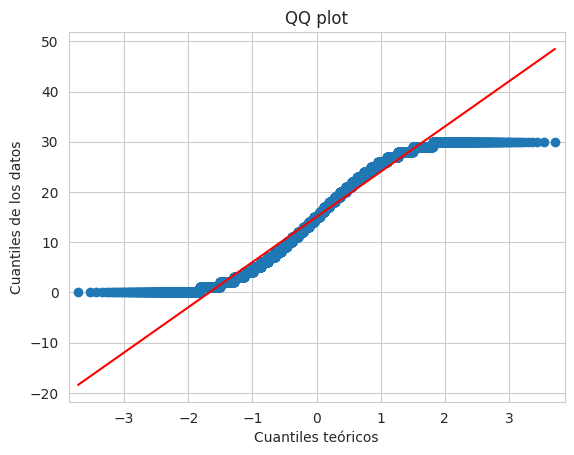

In [59]:
import statsmodels.api as sm

# QQ plot para la variable depression_score
sm.qqplot(df.depression_score, line='s')

# Configurar etiquetas y título
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.title('QQ plot')

plt.show()

In [60]:
# medidas de tendencia central
import scipy.stats as stats
stats.describe(df['depression_score'])

DescribeResult(nobs=np.int64(10000), minmax=(np.int64(0), np.int64(30)), mean=np.float64(15.0399), variance=np.float64(80.83519150915092), skewness=np.float64(0.0011521527984573825), kurtosis=np.float64(-1.2024193836214885))

In [61]:
# MAD para depression_score
# Calcular las desviaciones absolutas medianas
median = np.median(df.depression_score)
mad = np.median(np.abs(df.depression_score - median))

# Definir umbral para los outliers por lo general se usa desde 2,5 hasta 3,5
threshold = 3.5

# Detección de outliers
outliers = df.depression_score[np.abs(df.depression_score- median) / mad > threshold]

#veamos los resultados finales
print("Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):")
print(outliers)

Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):
Series([], Name: depression_score, dtype: int64)


Correlación de Pearson: -0.9391488496524328
Valor p: 0.0


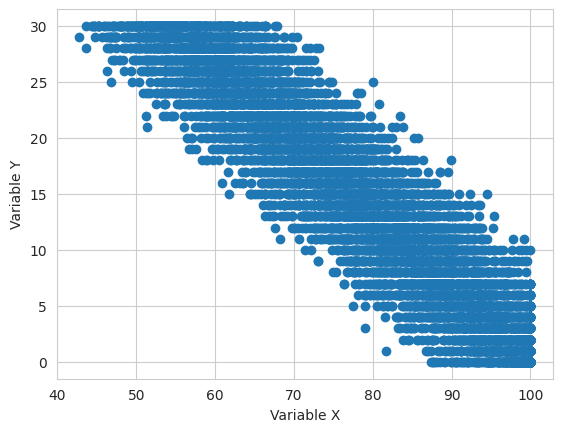

In [62]:
# Coeficiente de pearson
# Variables productivity_score y depression_score
x = df.productivity_score
y = df.depression_score

# Calcular la correlación de Pearson y su valor p
correlation, p_value = stats.pearsonr(x, y)

# Imprimir los resultados
print("Correlación de Pearson:", correlation)
print("Valor p:", p_value)

# Crear el gráfico de dispersión
plt.scatter(x, y)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

# Hay relacion entre las variables

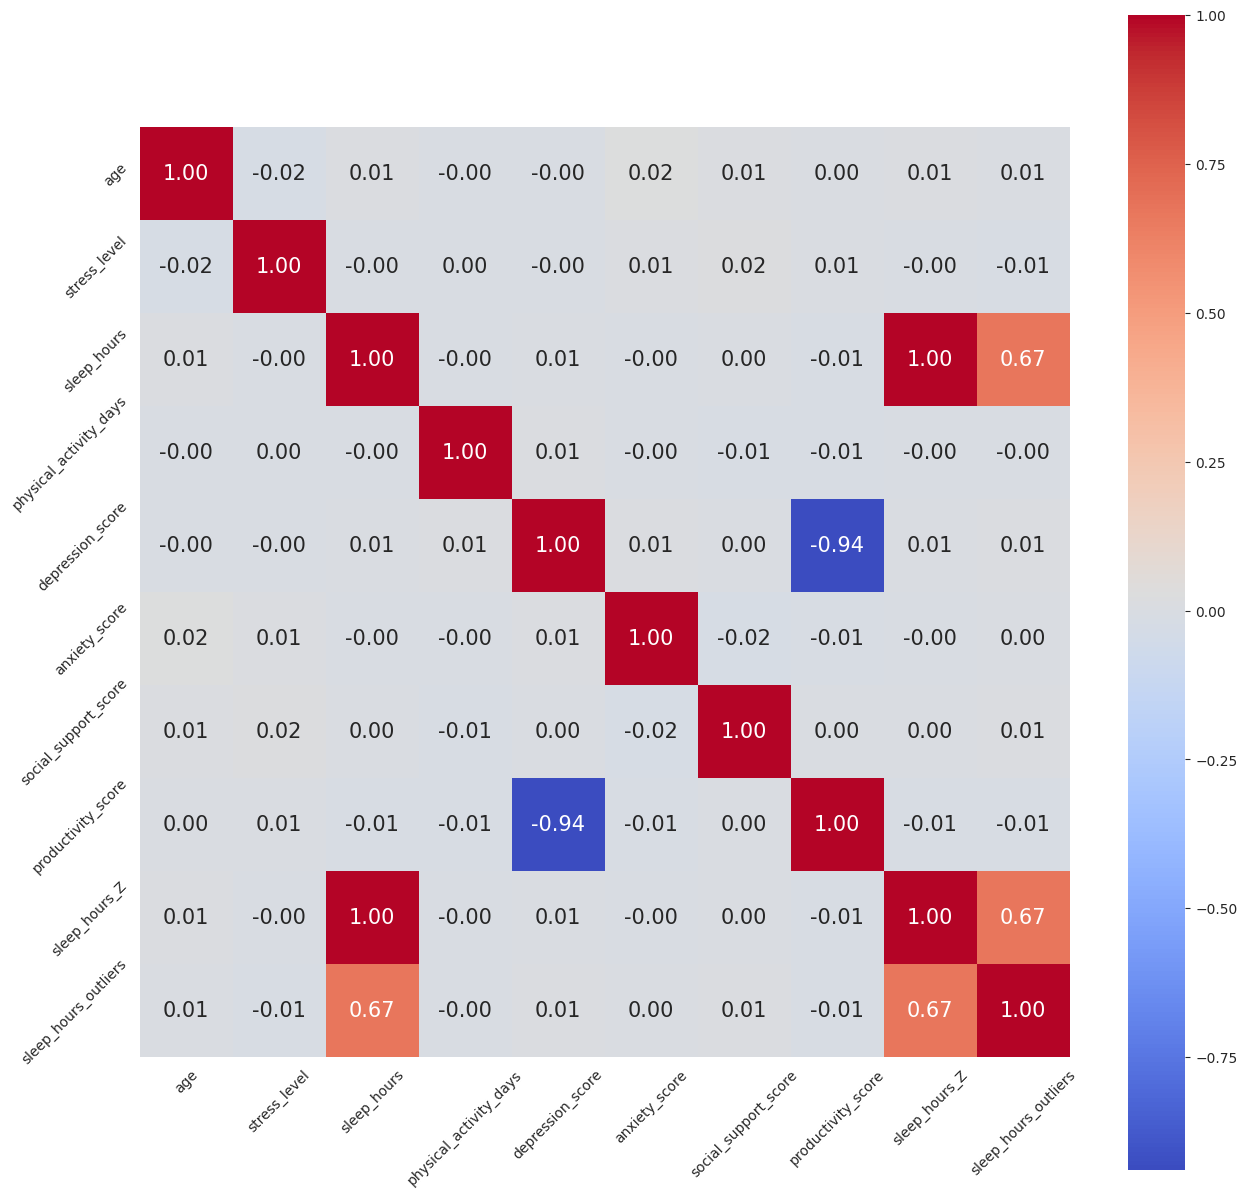

In [63]:
# Heatmap
correlation = df.select_dtypes(include=np.number).corr(method='pearson')

plt.figure(figsize=(15,15)) #tamaño de la figura

sns.heatmap(correlation,
            cbar=True,
            square=True,
            annot=True,
            fmt='.2f',
            annot_kws={'size':15},
            cmap='coolwarm')

#rotacion de ejes
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()